# Soal 2 - Preprocessing

### Import library

In [25]:
%pip install -q nltk Sastrawi matplotlib

import sys, os
sys.path.insert(0, os.path.abspath(".."))
from pathlib import Path

INPUT_DIR  = "data"
OUTPUT_DIR = "data/processed"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Path corpus

In [26]:
SAMPLES = [
    "113794790.techno.com.txt",
    "135035525.techno.com.txt",
]

HERE = Path.cwd()

DATA_DIR = HERE.parent / "data"
SRC_DIR  = HERE.parent / "src"

PROC_DIR = DATA_DIR / "processed"
PROC_DIR.mkdir(parents=True, exist_ok=True)

sys.path.insert(0, str(SRC_DIR.parent))

### Comparison 2 docs

In [27]:
SAMPLES = [
    "113794790.techno.com.txt",
    "135035525.techno.com.txt",
]

for fname in SAMPLES:
    raw_path = DATA_DIR / fname # file mentah
    proc_path = PROC_DIR / fname # file hasil preprocessing

    if not raw_path.exists():
        raise FileNotFoundError(f"Tidak ada: {raw_path}")

    with open(raw_path, "r", encoding="utf-8") as f:
        raw_txt = f.read()
    with open(proc_path, "r", encoding="utf-8") as f:
        proc_txt = f.read()

    print(f"\n📄 {fname}")
    print("=== BEFORE ===")
    print(raw_txt, "...\n")
    print("=== AFTER ===")
    print(proc_txt, "...\n")
    print("-" * 80)


📄 113794790.techno.com.txt
=== BEFORE ===
url: https://publikasi.dinus.ac.id/technoc/article/view/11379/4790
tanggal: 2024/08/23
judul: Evaluasi Performa Aplikasi Gojek Melalui Klasifikasi Kata Ulasan Pengguna Dengan Metode SVM
keyword: Analis Sentimen, Aplikasi Gojek, Evaluasi performa, FastText, SVM 
abstrak: Aplikasi Gojek, sebagai salah satu aplikasi ride-hailing terkemuka di Indonesia, menghadapi tantangan berkelanjutan dalam mempertahankan dan meningkatkan kualitas layanan serta kepuasan pengguna. Penelitian ini bertujuan mengevaluasi performa aplikasi Gojek melalui analisis sentimen dari 200.000 ulasan pengguna yang dikumpulkan dari platform aplikasi selama periode 2021-2024, menggunakan metode Support Vector Machine (SVM). Fokus penelitian meliputi aspek layanan, keamanan, promosi, dan masalah teknis. Metode SVM dipilih karena kemampuannya dalam menangani klasifikasi dengan dataset kompleks. Data ulasan pengguna, yang ditulis dalam bahasa Indonesia, diolah dengan teknik pemros

### Top 10 token paling muncul

In [28]:
from collections import Counter

top10_per_doc = {}

for f in sorted(PROC_DIR.glob("*.txt")):
    tokens = f.read_text(encoding="utf-8").split()
    counts = Counter(tokens).most_common(10)
    top10_per_doc[f.name] = counts

# Tampilkan ringkas per dokumen
for fname, pairs in top10_per_doc.items():
    print(f"\n📄 {fname} — Top 10 token")
    for tok, freq in pairs:
        print(f"  {tok:20s} {freq}")


📄 100614520.techno.com.txt — Top 10 token
  sakit                8
  kardiovaskular       8
  klasifikasi          7
  knearest             6
  knn                  5
  faktor               4
  recall               4
  precision            4
  fscore               4
  mati                 3

📄 110724704.techno.com.txt — Top 10 token
  hewan                13
  gambar               8
  data                 7
  model                6
  akurasi              6
  kelas                6
  web                  5
  cnn                  5
  interaktif           4
  nilai                4

📄 113554791.techno.com.txt — Top 10 token
  kulit                8
  sakit                7
  aplikasi             4
  sistem               3
  computer             3
  vision               3
  convolutional        3
  neural               3
  cnn                  3
  diagnosis            3

📄 113794790.techno.com.txt — Top 10 token
  aplikasi             7
  guna                 6
  svm                  6
  

### Grafik distribusi panjang

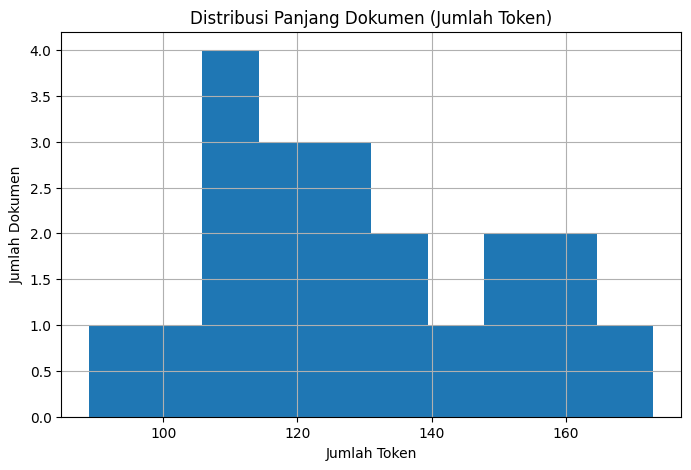


Ringkasan panjang token per dokumen:
- 100614520.techno.com.txt        136 token
- 110724704.techno.com.txt        149 token
- 113554791.techno.com.txt        106 token
- 113794790.techno.com.txt        133 token
- 123845297.techno.com.txt        149 token
- 126565308.techno.com.txt        160 token
- 127935337.techno.com.txt        112 token
- 128735492.techno.com.txt        124 token
- 129555493.techno.com.txt        106 token
- 135035525.techno.com.txt        161 token
- 136135519.techno.com.txt        119 token
- 137485529.techno.com.txt        173 token
- 137745514.techno.com.txt        118 token
- 88974145.techno.com.txt          89 token
- 90044164.techno.com.txt         127 token
- 96484460.techno.com.txt          98 token
- 96804333.techno.com.txt         114 token
- 97354334.techno.com.txt         140 token
- 97794326.techno.com.txt         116 token
- 98894514.techno.com.txt         125 token


In [29]:
import matplotlib.pyplot as plt

lengths = []
labels  = []

for f in sorted(PROC_DIR.glob("*.txt")):
    n = len(f.read_text(encoding="utf-8").split())
    lengths.append(n)
    labels.append(f.name)

plt.figure(figsize=(8,5))
plt.hist(lengths, bins=10)
plt.title("Distribusi Panjang Dokumen (Jumlah Token)")
plt.xlabel("Jumlah Token")
plt.ylabel("Jumlah Dokumen")
plt.grid(True)
plt.show()

print("\nRingkasan panjang token per dokumen:")
for name, n in zip(labels, lengths):
    print(f"- {name:30s} {n:4d} token")